In [72]:
import pandas as pd #Dataframe, Series
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io

from scipy import misc

from sklearn.metrics import accuracy_score

import spotipy
import spotipy.util as util
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 

%matplotlib inline

### Login

In [73]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

client_id = '164fe11263da4ce8b39cb03311385ce6'
client_secret = '448a0146206e4b718e4bcc0865efcd29'
redirect_uri='http://localhost:8080/callback'
username = '5865b9eadfc54092'
scope = 'user-library-read playlist-read-private'


#Credentials to access the Spotify Music Data
from spotipy.oauth2 import SpotifyOAuth
import spotipy

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id,
                                               client_secret,
                                               redirect_uri,
                                               scope = 'user-library-read playlist-read-private'))

### Input Data into Model

- gathering good and bad playlists
- The method signature is sp.user_playlist('user', 'playlist_id')
- To do this go to your good and bad playlists and copy the links.
    - An example spotify link: https://open.spotify.com/user/1287242681/playlist/5OdH7PmotfAO7qDGxKdw3J
    - The user is the number after user/ and the playlist id is after the playlist/.

In [74]:
good_playlist = sp.user_playlist("1287242681", "0zgnMFEGrQdROGaTmCDcdI")
bad_playlist = sp.user_playlist("1287242681", "37i9dQZF1EIeBK96mJllYR")

# https://open.spotify.com/playlist/0zgnMFEGrQdROGaTmCDcdI?si=3c6d800197624757
# https://open.spotify.com/playlist/4xsezTLL6nTw71prwB0IWE?si=1644f32f1e57424b
# https://open.spotify.com/playlist/37i9dQZF1EIeBK96mJllYR?si=6fc5535b01db45c4

In [75]:
#Get the good song id's out of the good playlists, need it for the audio features call.
good_tracks = good_playlist["tracks"]
good_songs = good_tracks["items"] 
while good_tracks['next']:
    good_tracks = sp.next(good_tracks)
    for item in good_tracks["items"]:
        good_songs.append(item)
good_ids = [] 
print(len(good_songs))
for i in range(len(good_songs)):
    print(good_songs[i]['track']['id'])
    good_ids.append(good_songs[i]['track']['id'])
# good_tracks

1111
4irYeuAi87yyGHcI4h9s0x
7Cye3UbCA6UNuDykdCf3AB
3SCVHoGHV7GL0hmqcOIpqh
5XAPpyIoYF3QXP34Hv8Pvx
3YeQsJs1FdLI3w0BqWwpmk
6GB3N6bDucdHThFVDCBcCv
5vyR3lTiw4zz8B4PvnAO4c
7zOIzXpbnCcx6iZfvOjGCQ
1rH7UXSGDTZBYPiRW3bNI6
7xVLFuuYdAvcTfcP3IG3dS
2NeHnSFnwNp1Z5WYgcjJ8L
3kpYJjvM8Ja6btr5hEJLWc
2QKBvCMHdokPoy2b44dK2m
5FE5o6S5W69D9F9Ay1QzHs
1Y5DXtYfMbUZxkVvdTmitd
7EnGzsqQi0bAVGQw8i4WIQ
551xyaSJsg8hILXFq9JdST
7gYY7Dh2YuEKG6e2UJR18y
0oSIYJiJNBXIMVCUEhsN1q
3cLXgIlvugVKpWBmO5v9oy
3PcrNUFsSYnkJJNE6roBKl
3OEnY5jdjIZcvl4zMG5DDj
32gSPav2xqFylAeCjJCxWi
4mx0eNjjZUyOzfY3I4P9HD
7x8dCjCr0x6x2lXKujYD34
1vcxF91pWs9uNwDROuiCPB
2VGQ342iuqj6aSaYbyBQVJ
2gVuP7yxrIsn2s3i68eHjt
2QqJTIlGKRLJC3onkavYEz
6sDCgB1Ulh7aw92mk0opyd
2WWruw7ul9N7eqoHELyMc2
6PnTgx9lyvLGIcPnroCvc2
792HwhrdO3ErRKL5yRe4Ge
1xipD8uEQwFFm6vAj1w8Uq
2CmbZP4WM419v36X0svMnk
3JKgcAa7r07ocVWcV8bS0H
6jmTHeoWvBaSrwWttr8Xvu
1gyRKqGojB0xbiommbjN32
6oBL8TdQHEO7jeEdqECg37
4D2pxxPpgyJdowXmebsXKs
1Syhm4vkn6n2DYuFnyI60s
4gxpxSVkqWo8IP2rGqzVXm
6qNLO4HzHeVvHxTaCFMXrf
5QuFo1

In [76]:
#Now do the same thing for the bad playlist
bad_tracks = bad_playlist["tracks"]
bad_songs = bad_tracks["items"] 
while bad_tracks['next']:
    bad_tracks = sp.next(bad_tracks)
    for item in bad_tracks["items"]:
        bad_songs.append(item)
bad_ids = [] 
print(len(bad_songs))
for i in range(len(bad_songs)):
    bad_ids.append(bad_songs[i]['track']['id'])

50


In [77]:
print(sp.audio_features(good_ids[0]))

[{'danceability': 0.849, 'energy': 0.648, 'key': 7, 'loudness': -6.188, 'mode': 1, 'speechiness': 0.0832, 'acousticness': 0.0725, 'instrumentalness': 0.00592, 'liveness': 0.0984, 'valence': 0.196, 'tempo': 106.075, 'type': 'audio_features', 'id': '4irYeuAi87yyGHcI4h9s0x', 'uri': 'spotify:track:4irYeuAi87yyGHcI4h9s0x', 'track_href': 'https://api.spotify.com/v1/tracks/4irYeuAi87yyGHcI4h9s0x', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4irYeuAi87yyGHcI4h9s0x', 'duration_ms': 111020, 'time_signature': 4}]


In [78]:
# remove unavailible tracks (features = NoneType)
filtered_ids = [id for id in good_ids if id is not None]
good_ids = filtered_ids

In [79]:
for i in range(0,len(good_ids),50):
    audio_features = sp.audio_features(good_ids[i:i+50])
    print(audio_features)

[{'danceability': 0.849, 'energy': 0.648, 'key': 7, 'loudness': -6.188, 'mode': 1, 'speechiness': 0.0832, 'acousticness': 0.0725, 'instrumentalness': 0.00592, 'liveness': 0.0984, 'valence': 0.196, 'tempo': 106.075, 'type': 'audio_features', 'id': '4irYeuAi87yyGHcI4h9s0x', 'uri': 'spotify:track:4irYeuAi87yyGHcI4h9s0x', 'track_href': 'https://api.spotify.com/v1/tracks/4irYeuAi87yyGHcI4h9s0x', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4irYeuAi87yyGHcI4h9s0x', 'duration_ms': 111020, 'time_signature': 4}, {'danceability': 0.625, 'energy': 0.45, 'key': 9, 'loudness': -9.985, 'mode': 1, 'speechiness': 0.0311, 'acousticness': 0.0776, 'instrumentalness': 0.000217, 'liveness': 0.117, 'valence': 0.0362, 'tempo': 92.974, 'type': 'audio_features', 'id': '7Cye3UbCA6UNuDykdCf3AB', 'uri': 'spotify:track:7Cye3UbCA6UNuDykdCf3AB', 'track_href': 'https://api.spotify.com/v1/tracks/7Cye3UbCA6UNuDykdCf3AB', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7Cye3UbCA6UNuDykdCf3AB', '

In [80]:
features = []
for i in range(0,len(good_ids),50):
    audio_features = sp.audio_features(good_ids[i:i+50])
    for track in audio_features:
        features.append(track)
        features[-1]['target'] = 1

In [81]:
features

[{'danceability': 0.849,
  'energy': 0.648,
  'key': 7,
  'loudness': -6.188,
  'mode': 1,
  'speechiness': 0.0832,
  'acousticness': 0.0725,
  'instrumentalness': 0.00592,
  'liveness': 0.0984,
  'valence': 0.196,
  'tempo': 106.075,
  'type': 'audio_features',
  'id': '4irYeuAi87yyGHcI4h9s0x',
  'uri': 'spotify:track:4irYeuAi87yyGHcI4h9s0x',
  'track_href': 'https://api.spotify.com/v1/tracks/4irYeuAi87yyGHcI4h9s0x',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4irYeuAi87yyGHcI4h9s0x',
  'duration_ms': 111020,
  'time_signature': 4,
  'target': 1},
 {'danceability': 0.625,
  'energy': 0.45,
  'key': 9,
  'loudness': -9.985,
  'mode': 1,
  'speechiness': 0.0311,
  'acousticness': 0.0776,
  'instrumentalness': 0.000217,
  'liveness': 0.117,
  'valence': 0.0362,
  'tempo': 92.974,
  'type': 'audio_features',
  'id': '7Cye3UbCA6UNuDykdCf3AB',
  'uri': 'spotify:track:7Cye3UbCA6UNuDykdCf3AB',
  'track_href': 'https://api.spotify.com/v1/tracks/7Cye3UbCA6UNuDykdCf3AB',
  'anal

In [83]:
#Here is where we get all of the audio_features for the tracks on the good and bad playlists.
features = []
inSavedTracks = []
j = 0
for i in range(0,len(good_ids),50):
    audio_features = sp.audio_features(good_ids[i:i+50])
    for track in audio_features:
        print(track)
        features.append(track)
        track = good_songs[j]
        j= j+1
        features[-1]['trackPopularity'] = track['track']['popularity']
        if track['track']['artists'][0]['id'] is not None:
            features[-1]['artistPopularity'] = sp.artist(track['track']['artists'][0]['id'])['popularity']
        features[-1]['target'] = 1
j = 0
for i in range(0,len(bad_ids),50):
    audio_features = sp.audio_features(bad_ids[i:i+50])
    for track in audio_features:
        print(track)
        features.append(track)
        track = good_songs[j]
        j= j+1
        features[-1]['trackPopularity'] = track['track']['popularity']
        if track['track']['artists'][0]['id'] is not None:
            features[-1]['artistPopularity'] = sp.artist(track['track']['artists'][0]['id'])['popularity']
        features[-1]['target'] = 0

{'danceability': 0.849, 'energy': 0.648, 'key': 7, 'loudness': -6.188, 'mode': 1, 'speechiness': 0.0832, 'acousticness': 0.0725, 'instrumentalness': 0.00592, 'liveness': 0.0984, 'valence': 0.196, 'tempo': 106.075, 'type': 'audio_features', 'id': '4irYeuAi87yyGHcI4h9s0x', 'uri': 'spotify:track:4irYeuAi87yyGHcI4h9s0x', 'track_href': 'https://api.spotify.com/v1/tracks/4irYeuAi87yyGHcI4h9s0x', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4irYeuAi87yyGHcI4h9s0x', 'duration_ms': 111020, 'time_signature': 4}
{'danceability': 0.625, 'energy': 0.45, 'key': 9, 'loudness': -9.985, 'mode': 1, 'speechiness': 0.0311, 'acousticness': 0.0776, 'instrumentalness': 0.000217, 'liveness': 0.117, 'valence': 0.0362, 'tempo': 92.974, 'type': 'audio_features', 'id': '7Cye3UbCA6UNuDykdCf3AB', 'uri': 'spotify:track:7Cye3UbCA6UNuDykdCf3AB', 'track_href': 'https://api.spotify.com/v1/tracks/7Cye3UbCA6UNuDykdCf3AB', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7Cye3UbCA6UNuDykdCf3AB', 'du

### Model Training and Data Modeling

In [84]:
trainingData = pd.DataFrame(features)
trainingData.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,trackPopularity,artistPopularity,target
0,0.849,0.648,7,-6.188,1,0.0832,0.0725,0.005920,0.0984,0.1960,...,audio_features,4irYeuAi87yyGHcI4h9s0x,spotify:track:4irYeuAi87yyGHcI4h9s0x,https://api.spotify.com/v1/tracks/4irYeuAi87yy...,https://api.spotify.com/v1/audio-analysis/4irY...,111020,4,6,85.0,1
1,0.625,0.450,9,-9.985,1,0.0311,0.0776,0.000217,0.1170,0.0362,...,audio_features,7Cye3UbCA6UNuDykdCf3AB,spotify:track:7Cye3UbCA6UNuDykdCf3AB,https://api.spotify.com/v1/tracks/7Cye3UbCA6UN...,https://api.spotify.com/v1/audio-analysis/7Cye...,206472,3,0,68.0,1
2,0.854,0.980,1,-1.181,1,0.0569,0.2630,0.000530,0.5480,0.2550,...,audio_features,3SCVHoGHV7GL0hmqcOIpqh,spotify:track:3SCVHoGHV7GL0hmqcOIpqh,https://api.spotify.com/v1/tracks/3SCVHoGHV7GL...,https://api.spotify.com/v1/audio-analysis/3SCV...,122000,4,0,85.0,1
3,0.753,0.679,5,-7.092,0,0.0349,0.3240,0.000042,0.4230,0.1900,...,audio_features,5XAPpyIoYF3QXP34Hv8Pvx,spotify:track:5XAPpyIoYF3QXP34Hv8Pvx,https://api.spotify.com/v1/tracks/5XAPpyIoYF3Q...,https://api.spotify.com/v1/audio-analysis/5XAP...,145078,4,0,85.0,1
4,0.933,0.424,1,-6.686,1,0.1270,0.0307,0.000000,0.1010,0.0775,...,audio_features,3YeQsJs1FdLI3w0BqWwpmk,spotify:track:3YeQsJs1FdLI3w0BqWwpmk,https://api.spotify.com/v1/tracks/3YeQsJs1FdLI...,https://api.spotify.com/v1/audio-analysis/3YeQ...,123469,4,75,85.0,1


In [85]:
train, test = train_test_split(trainingData, test_size = 0.15)
print("Training size: {}, Test size: {}".format(len(train),len(test)))

Training size: 978, Test size: 173


In [86]:
# Custom Color Palette for graphs
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

In [87]:
pos_tempo = trainingData[trainingData['target'] == 1]['tempo']
neg_tempo = trainingData[trainingData['target'] == 0]['tempo']
pos_dance = trainingData[trainingData['target'] == 1]['danceability']
neg_dance = trainingData[trainingData['target'] == 0]['danceability']
pos_duration = trainingData[trainingData['target'] == 1]['duration_ms']
neg_duration = trainingData[trainingData['target'] == 0]['duration_ms']
pos_loudness = trainingData[trainingData['target'] == 1]['loudness']
neg_loudness = trainingData[trainingData['target'] == 0]['loudness']
pos_speechiness = trainingData[trainingData['target'] == 1]['speechiness']
neg_speechiness = trainingData[trainingData['target'] == 0]['speechiness']
pos_valence = trainingData[trainingData['target'] == 1]['valence']
neg_valence = trainingData[trainingData['target'] == 0]['valence']
pos_energy = trainingData[trainingData['target'] == 1]['energy']
neg_energy = trainingData[trainingData['target'] == 0]['energy']
pos_acousticness = trainingData[trainingData['target'] == 1]['acousticness']
neg_acousticness = trainingData[trainingData['target'] == 0]['acousticness']
pos_key = trainingData[trainingData['target'] == 1]['key']
neg_key = trainingData[trainingData['target'] == 0]['key']
pos_instrumentalness = trainingData[trainingData['target'] == 1]['instrumentalness']
neg_instrumentalness = trainingData[trainingData['target'] == 0]['instrumentalness']
pos_popularity = trainingData[trainingData['target'] == 1]['trackPopularity']
neg_popularity = trainingData[trainingData['target'] == 0]['trackPopularity']

In [88]:
print(pos_tempo)


0       106.075
1        92.974
2       110.001
3       105.977
4       139.977
         ...   
1096    120.030
1097    126.056
1098    125.999
1099    124.998
1100     77.471
Name: tempo, Length: 1101, dtype: float64


In [89]:
print(neg_tempo)

1101    118.818
1102    187.573
1103    130.072
1104    130.725
1105    117.079
1106    140.099
1107    115.822
1108    128.054
1109    124.694
1110     81.114
1111    139.946
1112    131.745
1113    128.653
1114    125.963
1115    128.482
1116    137.009
1117     96.010
1118    128.047
1119    141.913
1120    119.981
1121    127.029
1122    133.992
1123    151.824
1124    131.892
1125    139.950
1126    179.879
1127    129.978
1128     93.698
1129    131.973
1130    135.989
1131    131.971
1132    156.252
1133    124.016
1134    137.931
1135    125.000
1136    142.514
1137    132.966
1138    127.974
1139    128.081
1140    123.018
1141    138.025
1142    148.859
1143    132.955
1144    111.395
1145    169.360
1146    154.052
1147    139.987
1148    131.935
1149    178.095
1150    137.957
Name: tempo, dtype: float64


In [90]:
print(pos_popularity)
print(neg_popularity)

0        6
1        0
2        0
3        0
4       75
        ..
1096    69
1097    45
1098    70
1099    15
1100     0
Name: trackPopularity, Length: 1101, dtype: int64
1101     6
1102     0
1103     0
1104     0
1105    75
1106    71
1107    71
1108    70
1109    64
1110    70
1111     0
1112    74
1113    61
1114    44
1115     0
1116     0
1117    61
1118    54
1119    40
1120    62
1121     0
1122     2
1123    65
1124    61
1125    82
1126    81
1127    71
1128    48
1129    76
1130    53
1131    58
1132    55
1133    80
1134     0
1135     0
1136    77
1137    71
1138    54
1139     0
1140     0
1141    68
1142    35
1143    54
1144     0
1145    58
1146    46
1147    81
1148     0
1149    53
1150    42
Name: trackPopularity, dtype: int64


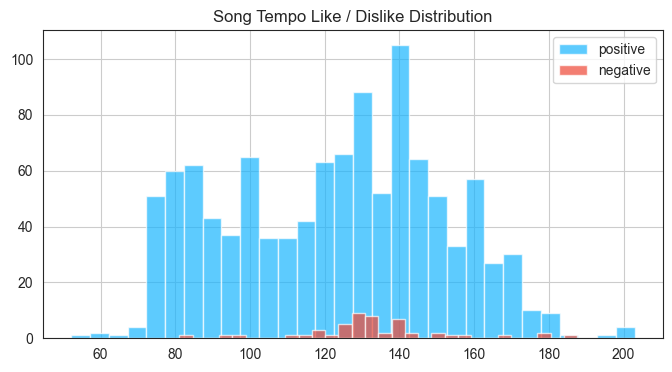

In [91]:
fig = plt.figure(figsize=(8,4))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

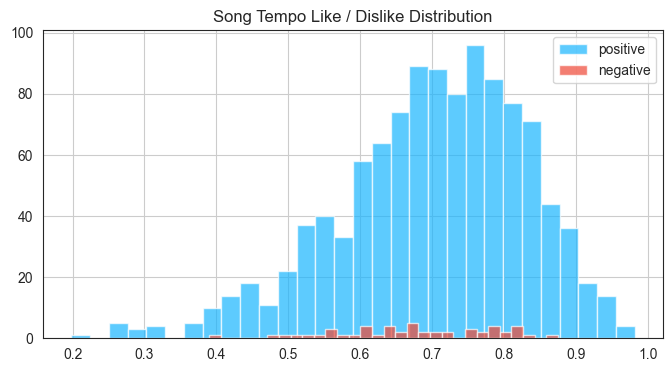

In [92]:
fig = plt.figure(figsize=(8,4))
plt.title("Song Tempo Like / Dislike Distribution")
pos_dance.hist(alpha=0.7, bins=30, label='positive')
neg_dance.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc='upper right')

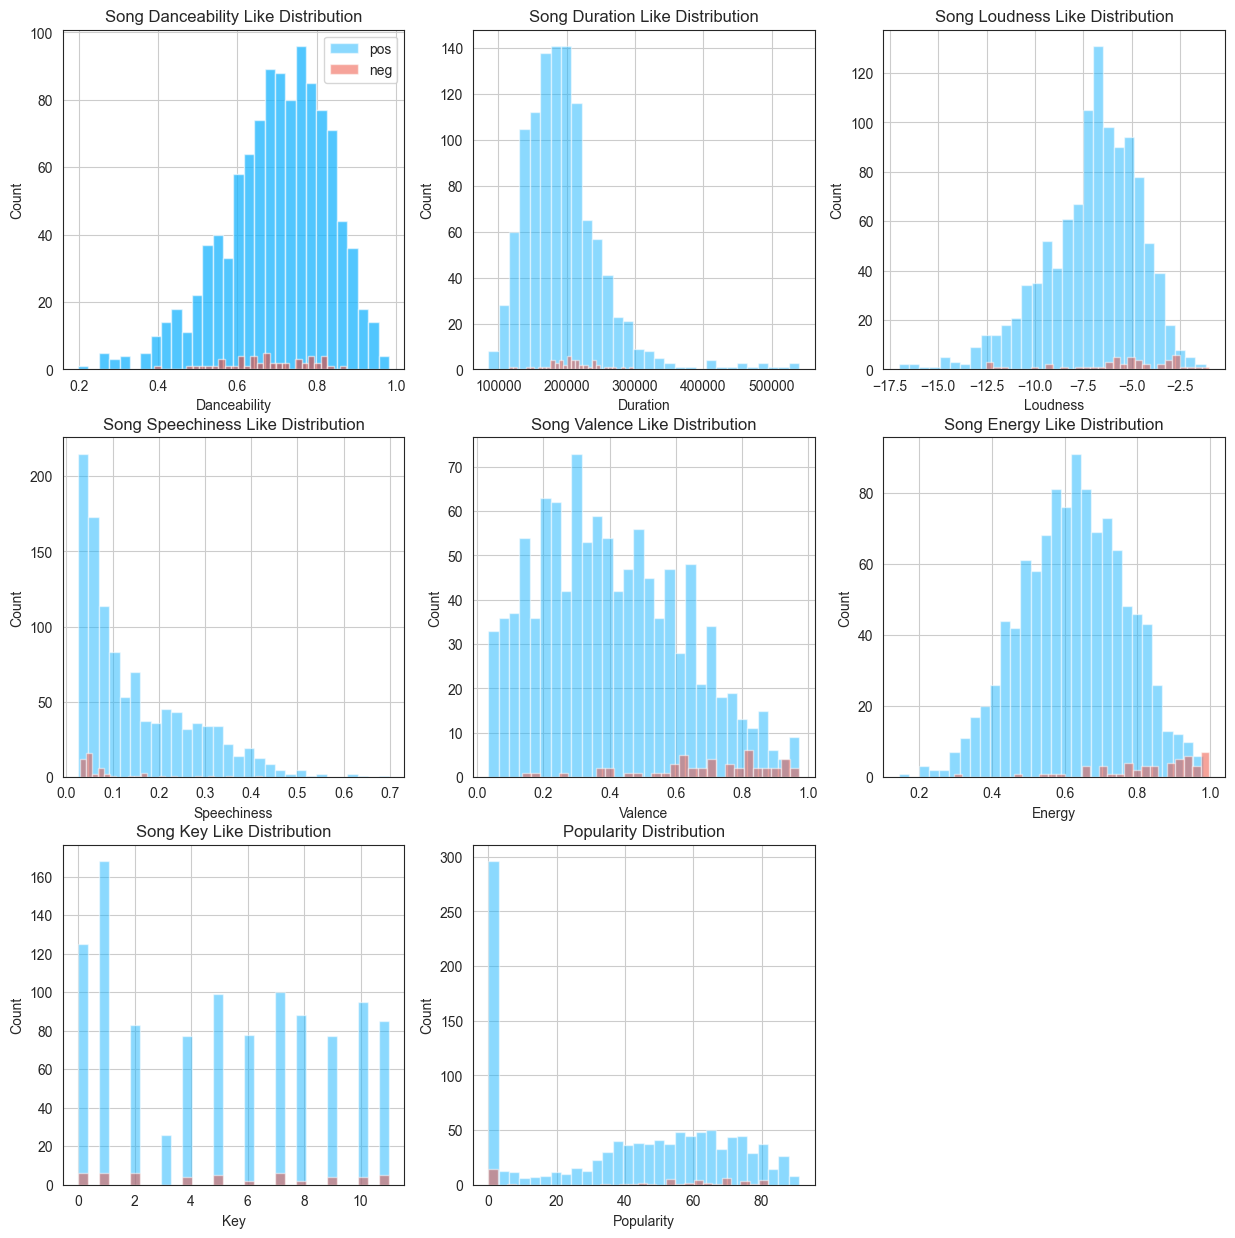

In [93]:
fig2 = plt.figure(figsize=(15,15))

#Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha= 0.5, bins=30, ax=ax3)
neg_dance.hist(alpha= 0.5, bins=30, ax=ax3)

#Duration_ms
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha= 0.5, bins=30, ax=ax5)
neg_duration.hist(alpha= 0.5, bins=30, ax=ax5)

#Loudness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha= 0.5, bins=30, ax=ax7)
neg_loudness.hist(alpha= 0.5, bins=30, ax=ax7)

#Speechiness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')
pos_speechiness.hist(alpha= 0.5, bins=30, ax=ax9)
neg_speechiness.hist(alpha= 0.5, bins=30, ax=ax9)

#Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha= 0.5, bins=30, ax=ax11)
neg_valence.hist(alpha= 0.5, bins=30, ax=ax11)

#Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha= 0.5, bins=30, ax=ax13)
neg_energy.hist(alpha= 0.5, bins=30, ax=ax13)

#Key
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')
pos_key.hist(alpha= 0.5, bins=30, ax=ax15)
neg_key.hist(alpha= 0.5, bins=30, ax=ax15)

#Popularity
ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Popularity')
ax17.set_ylabel('Count')
ax17.set_title('Popularity Distribution')
pos_popularity.hist(alpha= 0.5, bins=30, ax=ax17)
neg_popularity.hist(alpha= 0.5, bins=30, ax=ax17)

pos_dance.hist(alpha= 0.5, bins=30, ax=ax3, label='pos')
neg_dance.hist(alpha= 0.5, bins=30, ax=ax3, label='neg')
ax3.legend()

In [94]:
#Define the set of features that we want to look at
features = ["danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness","duration_ms"]

In [95]:
#Split the data into x and y test and train sets to feed them into a bunch of classifiers!
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]

In [96]:
c = DecisionTreeClassifier(min_samples_split=100)
dt = c.fit(x_train, y_train)

In [97]:
def show_tree(InputTree, features, path):
    f = io.StringIO()
    tree.export_graphviz(InputTree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
# TODO install 
# show_tree(dt, features, "dec_tree.png")

In [98]:
y_pred = c.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Decision Tree: ", round(score, 1), "%")

Accuracy using Decision Tree:  96.0 %


In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(x_train, y_train)
knn_pred = c.predict(x_test)
score = accuracy_score(y_test, knn_pred) * 100
print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  96.0 %


In [100]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)
score = accuracy_score(y_test, mlp_pred) * 100
print("Accuracy using mlp Tree: ", round(score, 1), "%")

Accuracy using mlp Tree:  96.0 %


In [101]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, forest_pred) * 100
print("Accuracy using random forest: ", round(score, 1), "%")

Accuracy using random forest:  97.1 %


In [102]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using ada: ", round(score, 1), "%")

c:\Users\Michael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy using ada:  97.1 %


In [103]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)
gauss_pred = gauss.predict(x_test)
score = accuracy_score(y_test, gauss_pred)*100
print("Accuracy using gauss: ", round(score, 1), "%")

Accuracy using gauss:  96.0 %


In [104]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(x_train, y_train)
predicted= k_means.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Kmeans: ", round(score, 1), "%")

Accuracy using Kmeans:  57.2 %


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
predicted = gbc.predict(x_test)
score = accuracy_score(y_test, predicted)*100
print("Accuracy using Gbc: ", round(score, 1), "%")

Accuracy using Gbc:  97.1 %


In [106]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
qda_pred = qda.predict(x_test)
score = accuracy_score(y_test, qda_pred)*100
print("Accuracy using qda: ", round(score, 1), "%")

Accuracy using qda:  96.0 %


In [107]:
from sklearn.svm import SVC
svc_lin = SVC(kernel="linear", C=0.025)
svc_lin.fit(x_train, y_train)
svc_pred = svc_lin.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, svc_pred) * 100
print("Accuracy using svc linear: ", round(score, 1), "%")

Accuracy using svc linear:  96.0 %


In [108]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gpc = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
gpc.fit(x_train, y_train)
gpc_pred = gpc.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, gpc_pred) * 100
print("Accuracy using gpc: ", round(score, 1), "%")

Accuracy using gpc:  61.8 %


In [109]:
client_id = '164fe11263da4ce8b39cb03311385ce6'
client_secret = '448a0146206e4b718e4bcc0865efcd29'
redirect_uri='http://localhost:8080/callback'
username = '5865b9eadfc54092'
scope = 'playlist-modify-private playlist-modify-public playlist-read-private user-library-read'


#Credentials to access the Spotify Music Data
from spotipy.oauth2 import SpotifyOAuth
import spotipy

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id,
                                               client_secret,
                                               redirect_uri,
                                               scope = 'user-library-read playlist-read-private'))

In [110]:
# https://open.spotify.com/playlist/37i9dQZEVXboFaKVZ0SRxM?si=5461b1f5714646cb
playlistToFindSongsYouLikeIn = sp.user_playlist("spotify", "37i9dQZEVXboFaKVZ0SRxM")

newPlaylist_tracks = playlistToFindSongsYouLikeIn["tracks"]
newPlaylist_songs = newPlaylist_tracks["items"] 
while newPlaylist_tracks['next']:
    newPlaylist_tracks = sp.next(newPlaylist_tracks)
    for song in newPlaylist_tracks["items"]:
        newPlaylist_songs.append(song)
        
newPlaylist_song_ids = [] 
print(len(newPlaylist_songs))
for i in range(len(newPlaylist_songs)):
    newPlaylist_song_ids.append(newPlaylist_songs[i]['track']['id'])
    
newPlaylist_features = []
j = 0
for i in range(0,len(newPlaylist_song_ids),50):
    audio_features = sp.audio_features(newPlaylist_song_ids[i:i+50])
    for track in audio_features:
        track['song_title'] = newPlaylist_songs[j]['track']['name']
        track['artist'] = newPlaylist_songs[j]['track']['artists'][0]['name']
        j= j + 1
        newPlaylist_features.append(track)
print(len(newPlaylist_features))

playlistToLookAtFeatures = pd.DataFrame(newPlaylist_features)

30
30


In [111]:
# https://open.spotify.com/playlist/7FoNW55Sdf38eY23BcQCDp?si=f6b9b38b8bd74613

pred = gbc.predict(playlistToLookAtFeatures[features])

to_add = []

likedSongs = 0
i = 0
for prediction in pred:
    if(prediction == 1):
        print ("Song: " + playlistToLookAtFeatures["song_title"][i] + ", By: "+ playlistToLookAtFeatures["artist"][i] + " id : " + playlistToLookAtFeatures["id"][i])
        # print(type(playlistToLookAtFeatures["id"][i]))
        to_add.append(playlistToLookAtFeatures['id'][i])
        likedSongs = likedSongs + 1
    i = i + 1

Song: BLACK OPS (with Denzel Curry), By: Kid Cudi id : 1Cb2etQ6t2ATWoKuOpDWuF
Song: Movement, By: Marshmello id : 6cXZ5xkPNb9P5C6Z9564Cx
Song: Call my name, By: AVAION id : 1mPhj6VWS4BsLQumiXcQXG
Song: Miroir Miroir (ABGT564) - Qrion Remix, By: CRi id : 1GMKsnjhiazt8wFg5B7ufI
Song: How Far Can You Go, By: Headhunterz id : 4tlvXAbJi9rEZfbtjevLn5
Song: schwarzer toyota, By: skrt cobain id : 6zV5WGrUYlR2i4AiaKfrKN
Song: I am aus Bayern, By: Oimara id : 3dflPkf9Zq9ImBOxTqZd9Z
Song: ONE NiGHT STAND (ONS), By: FiNCH id : 1TWqmtN3u2peKwZHPP36gX
Song: DTMS, By: Luciano id : 0B6Ibm1BDUqh6KxV1t5GtW
Song: Candlelights, By: makko id : 2q1ZbhSf0WXSwDqe17Jp6e
Song: ARABI, By: Mohamed Ramadan id : 1QBtiLpbw76bqO2h9fOdJQ
Song: Lost at Sea - ANNA Remix, By: Rob Grant id : 3d1sRLMVrXnCBawEZo69bR
Song: Falling, By: Camo & Krooked id : 0ySW1vdmqRwA95VvQOc0GC
Song: Nichts für immer, By: Zartmann id : 1eP7KUmLs2ncCxSj3oUMp0
Song: Scared To Start, By: Michael Marcagi id : 5tPS0TACDWeW2bEHbznmBO
Song: SNOWMAN

In [112]:
to_add

['1Cb2etQ6t2ATWoKuOpDWuF',
 '6cXZ5xkPNb9P5C6Z9564Cx',
 '1mPhj6VWS4BsLQumiXcQXG',
 '1GMKsnjhiazt8wFg5B7ufI',
 '4tlvXAbJi9rEZfbtjevLn5',
 '6zV5WGrUYlR2i4AiaKfrKN',
 '3dflPkf9Zq9ImBOxTqZd9Z',
 '1TWqmtN3u2peKwZHPP36gX',
 '0B6Ibm1BDUqh6KxV1t5GtW',
 '2q1ZbhSf0WXSwDqe17Jp6e',
 '1QBtiLpbw76bqO2h9fOdJQ',
 '3d1sRLMVrXnCBawEZo69bR',
 '0ySW1vdmqRwA95VvQOc0GC',
 '1eP7KUmLs2ncCxSj3oUMp0',
 '5tPS0TACDWeW2bEHbznmBO',
 '5OX5WINAGPw3piMH8IM3BV',
 '3gI1sT9ymXyxe8RZHukzxD',
 '280gb8mXCUDCvFQzmthd6g',
 '4eAV1ZCliRotEcjzEbOWNW',
 '0xuaMTaQFsfaLPuMoYUQoP',
 '6f2nWEm8aqMxKZtlxsyxWD',
 '7CUo7H7cq6mhkiSuqMsRQn',
 '6EDJUMi6j6GwcOgkK3bICo',
 '1GaelEndl8VDKKkb1CcHjd',
 '020fQowWGE54urxH67pgFx',
 '3E2eMXAAOViUsVKbL0vQip',
 '4sbl4SNfBkfijDEiaijhcC',
 '7Acwq0khyoAFO50WSfgc4t',
 '3ZVsF0bX4PZ1wukJPcJsSZ']

In [113]:
sp.user_playlist_add_tracks("5865b9eadfc54092", "7FoNW55Sdf38eY23BcQCDp", to_add)

{'snapshot_id': 'NixkNTQwNGU4ZjlkNWE4YjIzOGQ0ZGQ1ZjllNTVlYTAxOGI5MWUwMTkw'}